In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
import seaborn as sns

In [2]:
df_graph = pd.read_csv('withFollowRetweet.csv')

In [3]:
abuse_stat = pd.read_csv('abuse_graph_data.csv')
normal_stat = pd.read_csv('normal_graph_data.csv')

abuse_stat = abuse_stat[abuse_stat['degree']!=0]
normal_stat = normal_stat[normal_stat['degree']!=0]

In [17]:
normal_stat

,racism,sexism,normal,user_id,abuse,degree,closeness_centrality,betweenness_centrality,community,eigenvector_centrality,hubs,authorities,weighted_degree,clustering,pageRank,triangles,greedy_modularity_communities
0,0.0,0.000636,0.002418,2105021,0.000636,53,0.455787,0.009706,7,0.116395,7.377361e-03,7.377361e-03,51.008086,0.198113,0.006589,273,1
1,0.0,0.000000,0.000127,3236121,0.000000,11,0.350341,0.001169,15,0.010498,6.949953e-04,6.949953e-04,11.000000,0.145455,0.001607,8,0
2,0.0,0.000000,0.000127,8018342,0.000000,2,0.310599,0.000076,7,0.002676,1.724868e-04,1.724868e-04,2.000000,0.000000,0.000624,0,1
3,0.0,0.000000,0.000254,8532872,0.000000,3,0.368615,0.000000,4,0.017000,1.148199e-03,1.148199e-03,3.000000,1.000000,0.000510,3,0
4,0.0,0.000000,0.000636,9444022,0.000000,7,0.385666,0.000151,2,0.023382,1.578215e-03,1.578215e-03,7.000000,0.476190,0.001045,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.0,0.000127,0.000127,3063697555,0.000127,9,0.384069,0.000242,7,0.031493,2.076227e-03,2.076227e-03,9.000000,0.472222,0.001250,17,1
981,0.0,0.000127,0.000763,3063966541,0.000127,4,0.372127,0.000069,7,0.017957,1.178780e-03,1.178780e-03,4.000000,0.500000,0.000640,3,2
982,0.0,0.000000,0.000127,3066306967,0.000000,2,0.351170,0.000076,1,0.007312,4.545655e-04,4.545655e-04,1.002695,0.000000,0.000279,0,3
983,0.0,0.000000,0.000127,3068552947,0.000000,3,0.351836,0.000296,2,0.007845,2.356205e-04,2.356205e-04,1.005391,0.000000,0.000274,0,1


Abuse Community Average Degree: 8.062322946175637
Normal Community Average Degree: 9.496671105193077


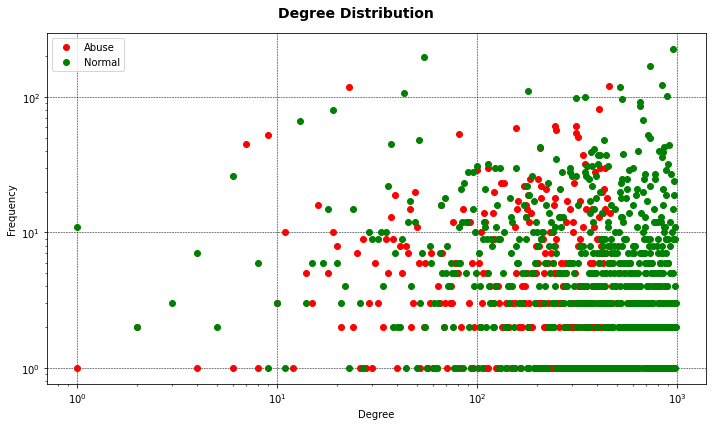

In [41]:

print('Abuse Community Average Degree:',np.average(abuse_stat['degree']))
print('Normal Community Average Degree:',np.average(normal_stat['degree']))
plt.figure(figsize=(10,6)) 
plt.loglog(abuse_stat['degree'],'ro') 
plt.loglog(normal_stat['degree'],'go') 
plt.suptitle('Degree Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(['Abuse','Normal'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

Abuse Community Average Weighted Degree: 7.2046455869214965
Normal Community Average Weighted Degree: 8.833311200519702


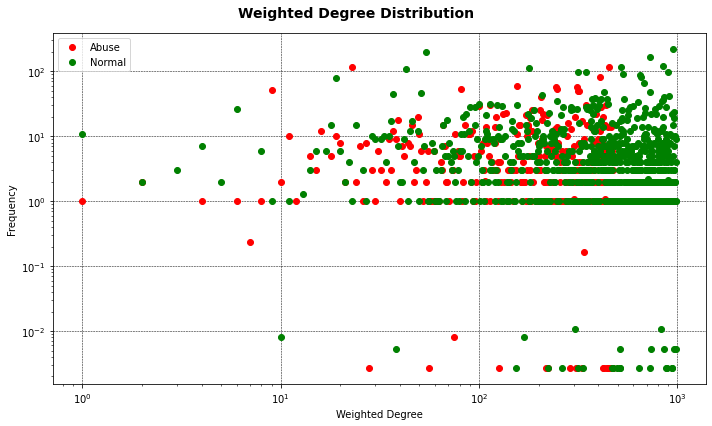

In [40]:
print('Abuse Community Average Weighted Degree:',np.average(abuse_stat['weighted_degree']))
print('Normal Community Average Weighted Degree:',np.average(normal_stat['weighted_degree']))
plt.figure(figsize=(10,6)) 
plt.loglog(abuse_stat['weighted_degree'],'ro') 
plt.loglog(normal_stat['weighted_degree'],'go') 
plt.suptitle('Weighted Degree Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Weighted Degree')
plt.ylabel('Frequency')
plt.legend(['Abuse','Normal'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

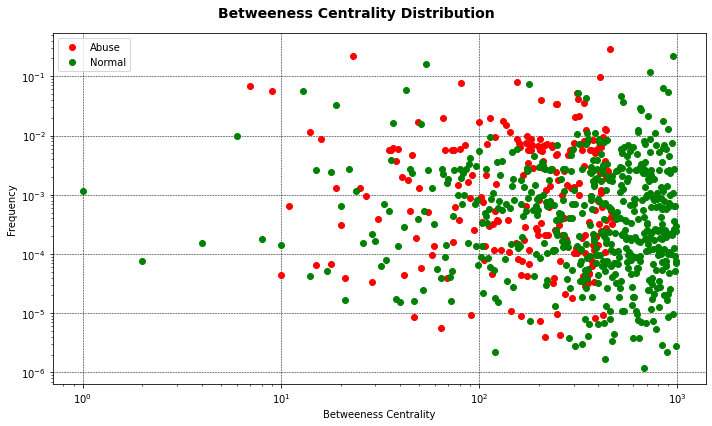

In [39]:
plt.figure(figsize=(10,6)) 
plt.loglog(abuse_stat['betweenness_centrality'],'ro') 
plt.loglog(normal_stat['betweenness_centrality'],'go') 
plt.suptitle('Betweeness Centrality Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Betweeness Centrality')
plt.ylabel('Frequency')
plt.legend(['Abuse','Normal'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

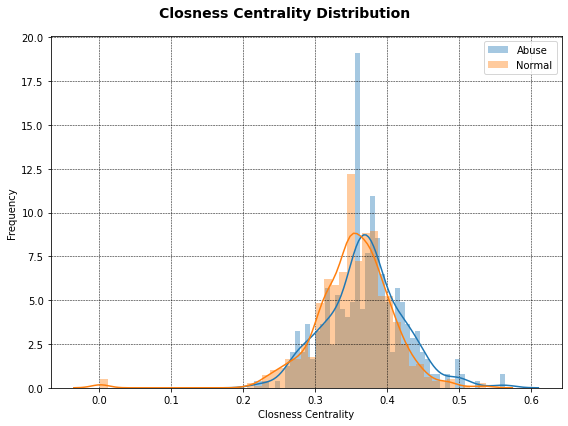

In [8]:
plt.figure(figsize=(8,6)) 
sns.distplot(abuse_stat['closeness_centrality'],bins=50) 
sns.distplot(normal_stat['closeness_centrality'],bins=50) 
plt.suptitle('Closness Centrality Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Closness Centrality')
plt.ylabel('Frequency')
plt.legend(['Abuse','Normal'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

In [9]:
print('Abuse Community Density:',0.023)
print('Normal Community Density:',0.013)

Abuse Community Density: 0.023
Normal Community Density: 0.013


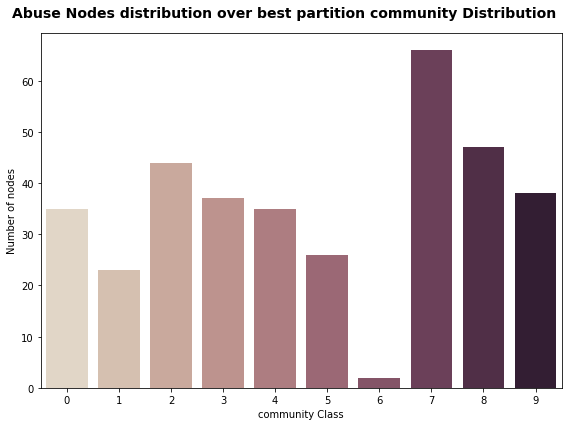

In [23]:
plt.figure(figsize=(8,6)) 
sns.countplot(abuse_stat['community'],palette="ch:.25") 

plt.suptitle('Abuse Nodes distribution over best partition community Distribution', fontsize=14,fontweight="bold")
plt.xlabel('community Class')
plt.ylabel('Number of nodes')
#plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

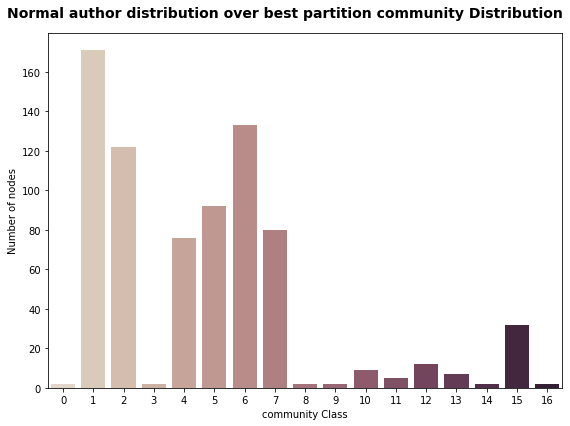

In [22]:
plt.figure(figsize=(8,6)) 
sns.countplot(normal_stat['community'],palette="ch:.25") 
plt.suptitle('Normal author distribution over best partition community Distribution', fontsize=14,fontweight="bold")
plt.xlabel('community Class')
plt.ylabel('Number of nodes')
#plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

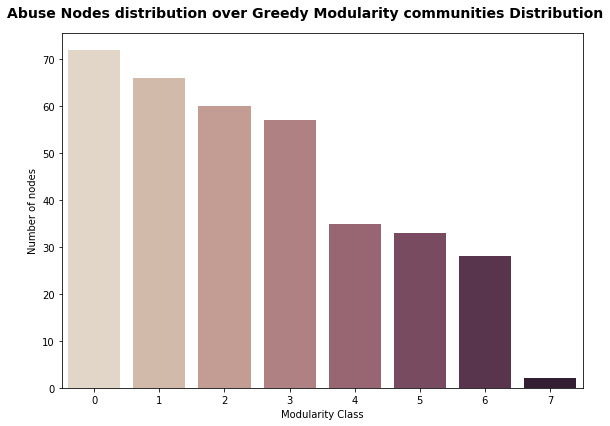

In [25]:
plt.figure(figsize=(8,6)) 
sns.countplot(abuse_stat['greedy_modularity_communities'],palette="ch:.25") 

plt.suptitle('Abuse Nodes distribution over Greedy Modularity communities Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Modularity Class')
plt.ylabel('Number of nodes')
#plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

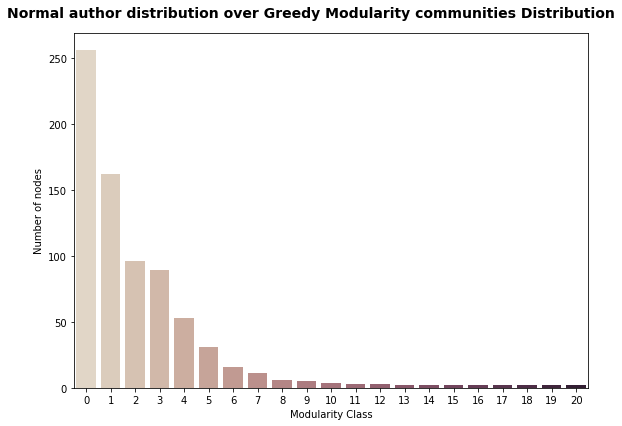

In [24]:
plt.figure(figsize=(8,6)) 
sns.countplot(normal_stat['greedy_modularity_communities'],palette="ch:.25") 
plt.suptitle('Normal author distribution over Greedy Modularity communities Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Modularity Class')
plt.ylabel('Number of nodes')
#plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

Abuse Avg. Clustering Coefficient: 0.3070359830617827
Normal Avg. Clustering Coefficient: 0.2717456681219975


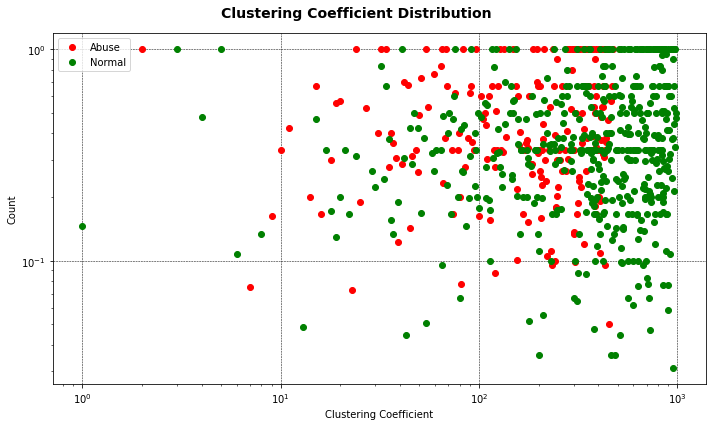

In [38]:
print("Abuse Avg. Clustering Coefficient:",np.average(abuse_stat['clustering']))
print("Normal Avg. Clustering Coefficient:",np.average(normal_stat['clustering']))


plt.figure(figsize=(10,6)) 
plt.loglog(abuse_stat['clustering'],'ro') 
plt.loglog(normal_stat['clustering'],'go') 
plt.suptitle('Clustering Coefficient Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Clustering Coefficient')
plt.ylabel('Count')
plt.legend(['Abuse','Normal'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()


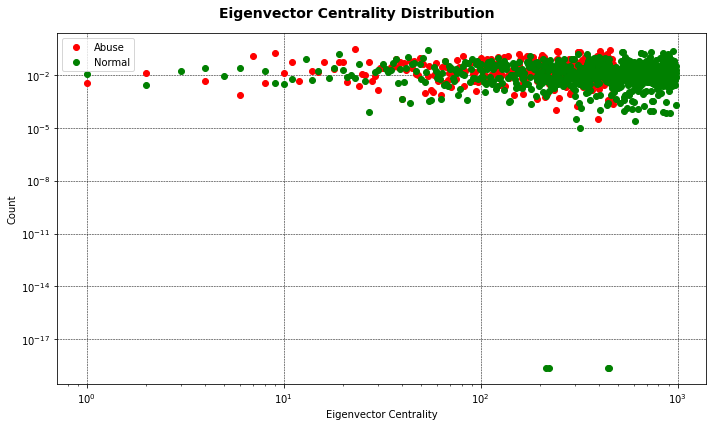

In [37]:
plt.figure(figsize=(10,6)) 
plt.loglog(abuse_stat['eigenvector_centrality'],'ro') 
plt.loglog(normal_stat['eigenvector_centrality'],'go') 
plt.suptitle('Eigenvector Centrality Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Count')
plt.legend(['Abuse','Normal'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()

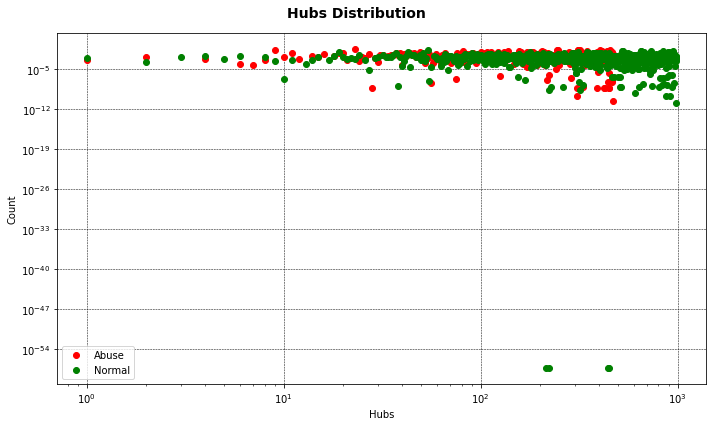

In [36]:
# HITS 
# E = 1.0E-4

plt.figure(figsize=(10,6)) 
plt.loglog(abuse_stat['hubs'],'ro') 
plt.loglog(normal_stat['hubs'],'go') 
plt.suptitle('Hubs Distribution', fontsize=14,fontweight="bold")
plt.xlabel('Hubs')
plt.ylabel('Count')
plt.legend(['Abuse','Normal'])
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.show()